In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pickle


In [4]:
df1=pd.read_csv("houses_train.csv")
df=df1.copy() 
df.head()

,Unnamed: 0,price,condition,district,max_floor,street,num_rooms,region,area,url,num_bathrooms,building_type,floor,ceiling_height
0,4598,100000.0,newly repaired,Arabkir,6,Kievyan St,3,Yerevan,96.0,http://www.myrealty.am/en/item/26229/3-senyaka...,1,stone,4,3.0
1,5940,52000.0,good,Arabkir,14,Mamikoniants St,3,Yerevan,78.0,http://www.myrealty.am/en/item/32897/3-senyaka...,1,panel,10,2.8
2,2302,52000.0,newly repaired,Qanaqer-Zeytun,9,M. Melikyan St,3,Yerevan,97.0,http://www.myrealty.am/en/item/1459/apartment-...,1,panel,1,2.8
3,5628,130000.0,good,Center,4,Spendiaryan St,3,Yerevan,80.0,http://www.myrealty.am/en/item/2099/3-senyakan...,1,stone,2,3.2
4,760,81600.0,zero condition,Center,9,Ler. Kamsar St,3,Yerevan,107.0,http://www.myrealty.am/en/item/22722/3-senyaka...,1,monolit,9,3.0


In [3]:
#dropping unnesesary columns
df.drop(["Unnamed: 0","url","region"],axis=1,inplace=True)
#there is only 1 region in column, so we are dropping it

(array([2.607e+03, 1.517e+03, 5.560e+02, 2.100e+02, 6.300e+01, 3.100e+01,
        1.400e+01, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([ 18500.,  71650., 124800., 177950., 231100., 284250., 337400.,
        390550., 443700., 496850., 550000.]),
 <BarContainer object of 10 artists>)

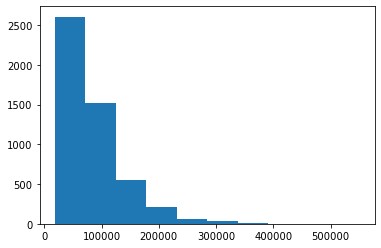

In [4]:
plt.hist(df.price)

In [5]:
df.head(10)

,price,condition,district,max_floor,street,num_rooms,area,num_bathrooms,building_type,floor,ceiling_height
0,100000.0,newly repaired,Arabkir,6,Kievyan St,3,96.0,1,stone,4,3.0
1,52000.0,good,Arabkir,14,Mamikoniants St,3,78.0,1,panel,10,2.8
2,52000.0,newly repaired,Qanaqer-Zeytun,9,M. Melikyan St,3,97.0,1,panel,1,2.8
3,130000.0,good,Center,4,Spendiaryan St,3,80.0,1,stone,2,3.2
4,81600.0,zero condition,Center,9,Ler. Kamsar St,3,107.0,1,monolit,9,3.0
5,123000.0,newly repaired,Center,5,Nalbandyan St,2,64.0,1,stone,2,3.0
6,40800.0,newly repaired,Malatia-Sebastia,9,Z.Andranik St,3,73.0,1,panel,2,2.8
7,47000.0,zero condition,Center,9,E. Qochar St,3,75.0,1,panel,2,2.8
8,90000.0,good,Center,4,D. Demirchyan St,3,90.0,1,stone,2,3.2
9,82000.0,newly repaired,Center,7,Heratsi St,3,94.0,1,monolit,7,2.8


In [6]:
#one hot encoding,representing non numeric data in numnerical format 
one_hot=pd.get_dummies(df)
one_hot.drop("price",axis=1,inplace=True)

In [7]:
#this colums we have already changed to numerical features, so we dont need them anymore
df.drop(["condition","district","building_type","street"],axis=1,inplace=True)

In [8]:
#getting our final data
final_df=pd.concat((df,one_hot),axis=1)


In [11]:
final_df

,price,max_floor,num_rooms,area,num_bathrooms,floor,ceiling_height,max_floor,num_rooms,area,...,street_Yerznkyan St,street_Z. Sarkavag 3 dead end,street_Z. Sarkavag St,street_Z.Andranik St,street_Zakyan St,street_Zavaryan St,building_type_monolit,building_type_other,building_type_panel,building_type_stone
0,100000.0,6,3,96.0,1,4,3.0,6,3,96.0,...,0,0,0,0,0,0,0,0,0,1
1,52000.0,14,3,78.0,1,10,2.8,14,3,78.0,...,0,0,0,0,0,0,0,0,1,0
2,52000.0,9,3,97.0,1,1,2.8,9,3,97.0,...,0,0,0,0,0,0,0,0,1,0
3,130000.0,4,3,80.0,1,2,3.2,4,3,80.0,...,0,0,0,0,0,0,0,0,0,1
4,81600.0,9,3,107.0,1,9,3.0,9,3,107.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,70000.0,5,3,97.0,1,4,2.8,5,3,97.0,...,0,0,0,0,0,0,0,0,0,1
4997,77000.0,4,3,71.0,1,4,2.8,4,3,71.0,...,0,0,0,0,0,0,0,0,0,1
4998,46000.0,5,1,40.0,1,2,3.0,5,1,40.0,...,0,0,0,0,0,0,0,0,0,1
4999,99000.0,14,4,118.0,2,14,3.0,14,4,118.0,...,0,0,0,0,0,0,1,0,0,0


In [12]:

#prepering our data for cross validation with different models
x=final_df.drop('price',axis=1)
y=final_df.price


In [23]:
#prepoocessing our data
x_scaled=StandardScaler().fit_transform(x)

with open("scale.pickle","wb") as f:
    pickle.dump(x_scaled,f)
    
    
with open("scale.pickle","rb") as f:
    mod=pickle.load(f)
    
    
mod.

TypeError: 'numpy.dtype[float64]' object is not callable

In [16]:
#lets try different algorithms with cross validation to predict our data and get their mse and rmse
import warnings
warnings.filterwarnings('ignore')

models=[LinearRegression(),Ridge(),Lasso(),KNeighborsRegressor(),RandomForestRegressor()]

models_rmse={}

for i in models:
    valid=cross_val_score(i,x_scaled,y,cv=10,scoring="neg_mean_squared_error")
    mse=np.mean(-valid)
    rmse=np.sqrt(mse)
    models_rmse[i]=rmse

#this search will last about 2 minutes

In [24]:
print(f"Sorted (from min to max) results of algorithms cross validation  {sorted(models_rmse.items(), key=lambda x: x[1])}")

# as we se best results have RandomForestRegressor, Ridge and Lasso regresions, so lets find best hyperparametres
# to increase their rmse

Sorted (from min to max) results of algorithms cross validation  [(RandomForestRegressor(), 21621.130732341673), (Lasso(), 24299.779083651607), (Ridge(), 24318.224429643524), (KNeighborsRegressor(), 26519.01033709828), (LinearRegression(), 1.4966396753651994e+18)]


In [25]:
# Finding  best paramentres for Randomforestregresor
params={
 'max_depth': [10, 20, 30, 40, 50, 60, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,150,200, 400, 600, 800]}



#grid=GridSearchCV(RandomForestRegressor(),param_grid=params,verbose=4,cv=3)
#grid.fit(x_scaled,ytest)


#Thes searche will last about 20-30 minutes, I have already tested it and get best paramentres for Randomforestregresion
#The best params are {"max_depth":None, "min_samples_leaf":1, "min_samples_split":2, "n_estimators":100} and the best RMSE
#is 21,654


In [26]:
# Finding  best paramentres for Ridge regresion 

params_Ridge = {'alpha': [2,1.5,1,0.5,0.1,0.01,0.001,0.0001]}

ridge_grid=GridSearchCV(Ridge(),param_grid=params_Ridge,cv=10,scoring="neg_mean_squared_error")
ridge_grid.fit(x_scaled,y)
print(f"the Ridge regresion best params is {ridge_grid.best_params_} and RMSE is {np.sqrt(-ridge_grid.best_score_)}")

the Ridge regresion best params is {'alpha': 2} and RMSE is 24317.22842992543


In [27]:
# Finding  best paramentres for for Lasso regresion 

params_Lasso = {'alpha': [2,1.5,1,0.5,0.1,0.01,0.001,0.0001]}

lasso_grid=GridSearchCV(Lasso(),param_grid=params_Lasso,cv=10,verbose=4)
#lasso_grid.fit(x,y), searching will last 10 miutes, i have already tested it and find best paramentre for Lasso
#The best alpha is 1.5 and best RMSE is 24716

the lowest RMSE has Randomforestregressor, so lets use it for our prediction


In [28]:

import joblib 

def final_predict(final_test_df):
    #1. preprocessing of final_test_df (scaling, one hot encoding ...)
    #2. make sure that columns and their order in train and test are the same
    #3. return predictions
    
    #dropp unnesesary colums if they are in test data
    unnesesary_columns=["Unnamed: 0","url","region"]
    for i in final_test_df.columns:
        if i in unnesesary_columns:
            final_test_df.drop([i],axis=1,inplace=True)
    
    #if there are  missing values filling with the next value
    final_test_df.fillna(method='bfill', inplace=True) 
    
    
    #one hot encoding
    
    test=pd.get_dummies(final_test_df)
    
    #making train and test data columns with the same features
    final_train,final_test=final_df.align(test,join="inner",axis=1)
    
    #prepering our data for preprocessing and training
    
    
    X_final_train=final_train.drop("price",axis=1)
    Y_final_train=final_train["price"]
    
    
    x_final_test=final_test.drop("price",axis=1)
    y_final_test=final_test["price"]
    
    #preprocessing with StandartScaler with respect to train mean and std
    scale=StandardScaler().fit(X_final_train)
    scaled_final_train=scale.transform(X_final_train)
    scaled_final_test=scale.transform(x_final_test)

    #training and testing our data with the best model and best paramentres

   
    model=RandomForestRegressor(max_depth=None,min_samples_leaf=1, min_samples_split=2, n_estimators= 100)
    
    model.fit(scaled_final_train,Y_final_train)
    
    print("The lenght of the columns is", scaled_final_train.shape[1])
    
    
    prediction=model.predict(scaled_final_test)
    
    function_rmse=np.sqrt(mean_squared_error(y_final_test,prediction))
    print("Root mean scuare error:",function_rmse)
    
    joblib.dump(model,"Yerevan_house_prices_model")
    
    return prediction
    






In [29]:
test=pd.read_csv("houses_test.csv")
final_predict(test)

The lenght of the columns is 237
Root mean scuare error: 21469.091997464817


array([ 91059.        , 125284.        ,  51348.        , ...,
        40462.66666667,  62830.        , 137580.        ])

In [30]:
mod=joblib.load("Yerevan_house_prices_model") # this model should test inside the function, for getting the same feature size
# as we got after feature changings

In [5]:
df1

,Unnamed: 0,price,condition,district,max_floor,street,num_rooms,region,area,url,num_bathrooms,building_type,floor,ceiling_height
0,4598,100000.0,newly repaired,Arabkir,6,Kievyan St,3,Yerevan,96.0,http://www.myrealty.am/en/item/26229/3-senyaka...,1,stone,4,3.0
1,5940,52000.0,good,Arabkir,14,Mamikoniants St,3,Yerevan,78.0,http://www.myrealty.am/en/item/32897/3-senyaka...,1,panel,10,2.8
2,2302,52000.0,newly repaired,Qanaqer-Zeytun,9,M. Melikyan St,3,Yerevan,97.0,http://www.myrealty.am/en/item/1459/apartment-...,1,panel,1,2.8
3,5628,130000.0,good,Center,4,Spendiaryan St,3,Yerevan,80.0,http://www.myrealty.am/en/item/2099/3-senyakan...,1,stone,2,3.2
4,760,81600.0,zero condition,Center,9,Ler. Kamsar St,3,Yerevan,107.0,http://www.myrealty.am/en/item/22722/3-senyaka...,1,monolit,9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,3585,70000.0,newly repaired,Arabkir,5,Griboedov St,3,Yerevan,97.0,http://www.myrealty.am/en/item/36852/3-senyaka...,1,stone,4,2.8
4997,3291,77000.0,newly repaired,Arabkir,4,Orbeli Yeghbayrner St,3,Yerevan,71.0,http://www.myrealty.am/en/item/13933/Apartment...,1,stone,4,2.8
4998,5959,46000.0,zero condition,Center,5,Mashtots Ave,1,Yerevan,40.0,http://www.myrealty.am/en/item/31190/1-senyaka...,1,stone,2,3.0
4999,542,99000.0,newly repaired,Center,14,Argishti St,4,Yerevan,118.0,http://www.myrealty.am/en/item/25905/4-senyaka...,2,monolit,14,3.0


In [6]:
df.drop(["Unnamed: 0","region"],axis=1,inplace=True)

In [11]:
df=pd.get_dummies(df)
df

,price,max_floor,num_rooms,area,num_bathrooms,floor,ceiling_height,condition_good,condition_newly repaired,condition_zero condition,...,url_http://www.myrealty.am/en/item/9895/2-senyakanoc-bnakaran-vacharq-Yerevan-Arabkir,url_http://www.myrealty.am/en/item/9908/Apartment-for-sale-in-Yerevan,url_http://www.myrealty.am/en/item/9923/2-senyakanoc-bnakaran-vacharq-Yerevan-Center,url_http://www.myrealty.am/en/item/9934/apartment-for-sale-in-Yerevan,url_http://www.myrealty.am/en/item/9937/2-senyakanoc-bnakaran-vacharq-Yerevan-Arabkir,url_http://www.myrealty.am/en/item/9953/apartment-for-sale-in-Yerevan,building_type_monolit,building_type_other,building_type_panel,building_type_stone
0,100000.0,6,3,96.0,1,4,3.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,52000.0,14,3,78.0,1,10,2.8,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,52000.0,9,3,97.0,1,1,2.8,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,130000.0,4,3,80.0,1,2,3.2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,81600.0,9,3,107.0,1,9,3.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,70000.0,5,3,97.0,1,4,2.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4997,77000.0,4,3,71.0,1,4,2.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4998,46000.0,5,1,40.0,1,2,3.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4999,99000.0,14,4,118.0,2,14,3.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
from sklearn.linear_model import LinearRegression

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [14]:
x=df.drop(["price"],axis=1)

In [16]:
y=df["price"]

In [25]:
pilin=Pipeline([("sc",StandardScaler()),("pc",PCA(n_components=2)),("lin_reg",LinearRegression())])



In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=5,test_size=0.2)

In [26]:
pilin.fit(xtrain,ytrain)

Pipeline(steps=[('sc', StandardScaler()), ('pc', PCA(n_components=2)),
                ('lin_reg', LinearRegression())])

In [31]:
prediction=pilin.predict(xtest)

In [37]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [32]:
r2_score(ytest,prediction)

0.49359997057322835